# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each.

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values.

In [3]:
# Your code here

import pandas as pd


df = pd.read_csv('boston_data.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     404 non-null    float64
 1   zn       404 non-null    float64
 2   indus    404 non-null    float64
 3   chas     404 non-null    float64
 4   nox      404 non-null    float64
 5   rm       404 non-null    float64
 6   age      404 non-null    float64
 7   dis      404 non-null    float64
 8   rad      404 non-null    float64
 9   tax      404 non-null    float64
 10  ptratio  404 non-null    float64
 11  black    404 non-null    float64
 12  lstat    404 non-null    float64
 13  medv     404 non-null    float64
dtypes: float64(14)
memory usage: 44.3 KB


In [4]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [5]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

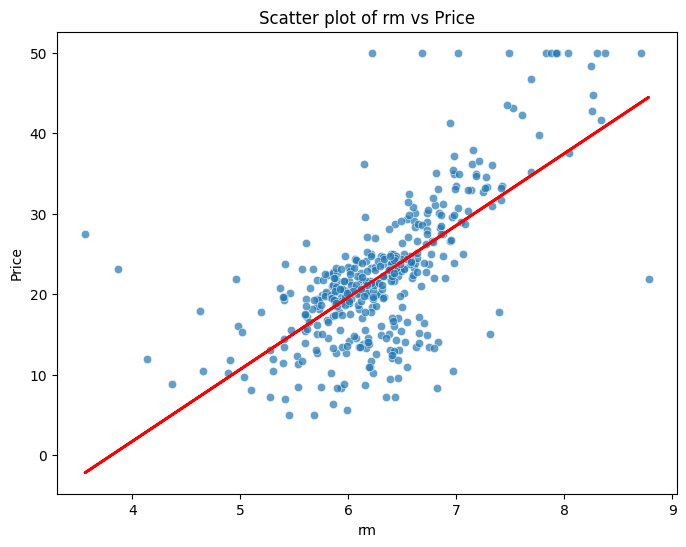

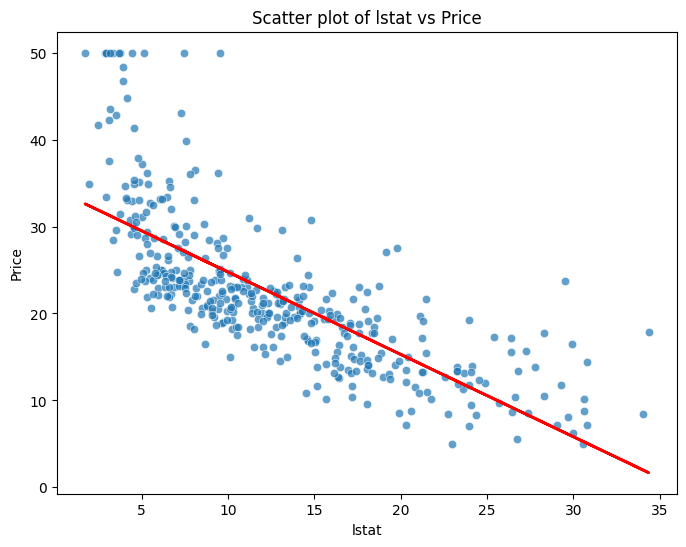

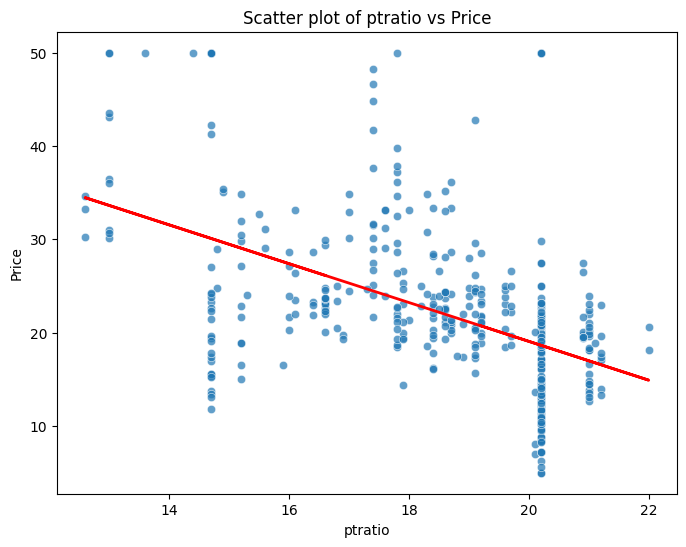

In [6]:
# Your plots here

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Select variables correlated with the prices of homes
selected_variables = ['rm', 'lstat', 'ptratio']

# Create scatter plots with regression lines
for var in selected_variables:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[var], y=df['medv'], alpha=0.7)
    plt.title(f'Scatter plot of {var} vs Price')
    plt.xlabel(var)
    plt.ylabel('Price')

    # Fit a linear regression model
    lr = LinearRegression()
    lr.fit(df[[var]], df['medv'])
    plt.plot(df[var], lr.predict(df[[var]]), color='red', linewidth=2)

    plt.show()



### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [7]:
# Your response here

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

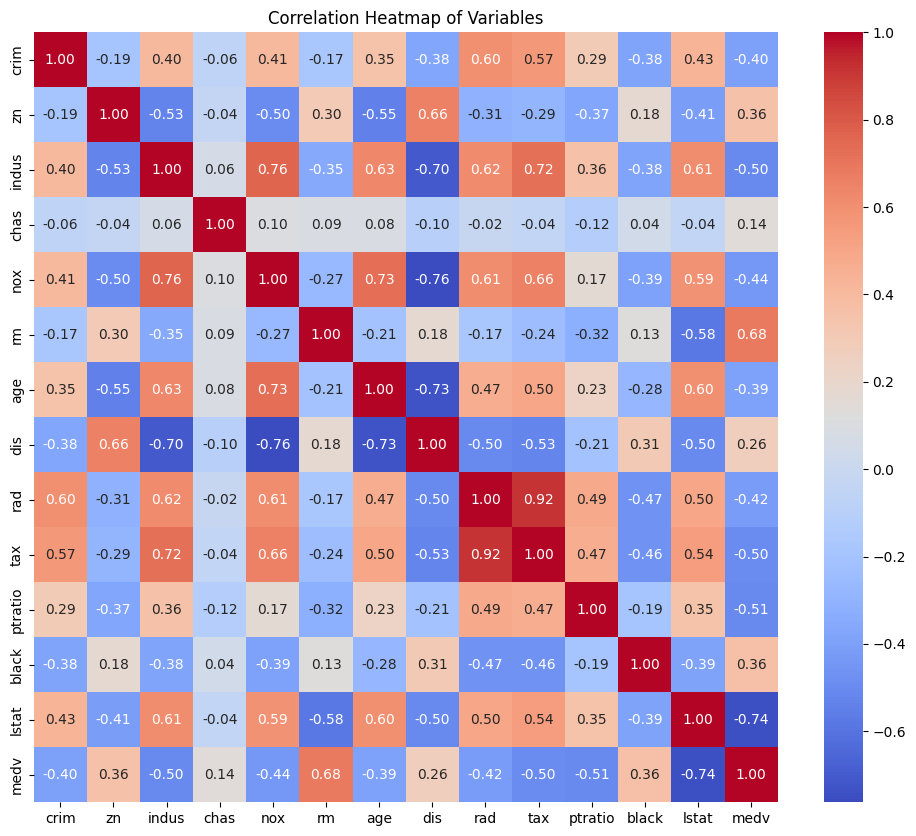

In [8]:
# Your response here


import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Variables')
plt.show()


### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation.

In [9]:
# Your code here


df['medv'].describe()

count    404.000000
mean      22.312376
std        8.837019
min        5.000000
25%       17.100000
50%       21.400000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score.

In [10]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between
        true and predicted values based on the metric chosen. """
    # Your code here:

    r2 = r2_score(y_true, y_predict)
    return r2


### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test.

In [11]:
# Your code here

from sklearn.model_selection import train_test_split

# Split the data into features (X) and target variable (y)
X = df.drop(columns=['medv'])  # Features
y = df['medv']  # Target variable

# Split the data into training and testing sets with shuffling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

# Verify the shape of the datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (323, 13) (323,)
Testing set shape: (81, 13) (81,)


----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively.

In [12]:
# Five separate RFR here with the given max depths

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Define max_depth values to test
max_depth_values = [2, 4, 6, 8, 10]


# Dictionary to store the models and their performance metrics
models = {}

# Loop through each max_depth value
for max_depth in max_depth_values:
    # Create Random Forest Regressor model with specified max_depth
    model = RandomForestRegressor(n_estimators=100, max_depth=max_depth, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Predict on the testing set
    y_pred = model.predict(X_test)

    # Calculate performance metrics (MSE and R2)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store the model and its performance metrics
    models[max_depth] = {'model': model, 'mse': mse, 'r2': r2}

# Print the performance metrics for each model
for max_depth, result in models.items():
    print(f"Max Depth: {max_depth}, MSE: {result['mse']}, R2: {result['r2']}")



Max Depth: 2, MSE: 18.580244214129085, R2: 0.6066227237281319
Max Depth: 4, MSE: 15.56650415324331, R2: 0.670429035576344
Max Depth: 6, MSE: 13.762876410282304, R2: 0.7086150874256971
Max Depth: 8, MSE: 13.096241219607352, R2: 0.7227289565736212
Max Depth: 10, MSE: 13.492105599519453, R2: 0.7143477937778999


Now, plot the score for each tree on the training set and on the testing set.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without featu

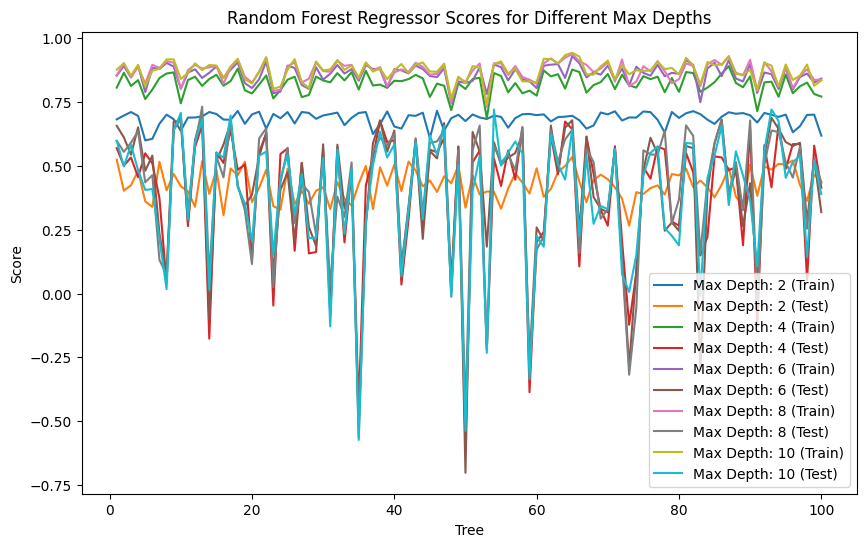

In [19]:
# Produce a plot with the score for the testing and training for the different max depths

import numpy as np

# Dictionary to store the scores for each max_depth
train_scores = {}
test_scores = {}

# Loop through each max_depth value
for max_depth in max_depth_values:
    train_scores[max_depth] = []
    test_scores[max_depth] = []

    # Create Random Forest Regressor model with specified max_depth
    model = RandomForestRegressor(n_estimators=100, max_depth=max_depth, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Loop through each tree in the forest
    for i, tree in enumerate(model.estimators_):
        # Calculate training set score
        train_score = tree.score(X_train, y_train)
        train_scores[max_depth].append(train_score)

        # Calculate testing set score
        test_score = tree.score(X_test, y_test)
        test_scores[max_depth].append(test_score)

# Plotting
plt.figure(figsize=(10, 6))

for max_depth in max_depth_values:
    plt.plot(np.arange(1, 101), train_scores[max_depth], label=f"Max Depth: {max_depth} (Train)")
    plt.plot(np.arange(1, 101), test_scores[max_depth], label=f"Max Depth: {max_depth} (Test)")

plt.xlabel('Tree')
plt.ylabel('Score')
plt.title('Random Forest Regressor Scores for Different Max Depths')
plt.legend()
plt.show()



What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [14]:
# Your response here


"""
Initially, as the max depth increases, the testing score also improves. This is because deeper trees can capture more information
from the training data, allowing the model to make more accurate predictions on the testing data.

However, beyond a certain point, increasing the max depth may lead to overfitting. The model starts to memorize noise in the training data,
causing a decline in performance on the testing data. This is indicated by a decrease in the testing score after reaching a peak.


"""

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? Check out this article before answering: https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229

In [15]:
# Your response here

"""
When the model is trained with a maximum depth of 1:

The model tends to suffer from high bias and low variance.
High bias refers to the situation where the model is too simplistic to capture the underlying patterns in the data.
Low variance indicates that the model's predictions are relatively consistent across different training sets.

When the model is trained with a maximum depth of 10:

The model is more likely to suffer from high variance and low bias.
High variance arises when the model is overly complex, capturing noise and fluctuations in the training data rather than the underlying patterns.
Low bias indicates that the model is sufficiently complex to capture the underlying patterns in the data.
However, this complexity may lead to overfitting, where the model performs well on the training data but generalizes poorly to unseen data.

"""

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [20]:
# Your response here

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [2, 4, 6, 8, 10]
}

# Initialize Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Assess performance on the testing set
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Performance on Testing Set:")
print("MSE:", mse)
print("R2 Score:", r2)


Best Parameters: {'max_depth': 10}
Performance on Testing Set:
MSE: 13.492105599519453
R2 Score: 0.7143477937778999


### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [17]:
# Your response here

"""

The model based on data from 1978 might not be good for real-life use today. The data is old, so it might not reflect current housing trends or what people look for in homes now.
Also, the features used in the model might not be enough to describe a house accurately.
The model has a R2 of 0.71 so it is not very reliable because it's based on old data and simple features.
Lastly, data from a big city like Boston might not apply well to a small rural town because housing needs and markets can be very different between urban and rural areas. So, overall, using this model for real-world predictions might not be a good idea.


"""